In [50]:
import os

from io import StringIO
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import expit
from scipy.stats import norm, ttest_rel, pearsonr, spearmanr

from sklearn.preprocessing import StandardScaler
import umap
import hdbscan

from itertools import product

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = '12'

## Hyperparams

In [2]:
threads = 3
elites = 10
n_per_trial = threads * elites
exp_names = ['true', 'false']

In [3]:
results_dir = {e: sorted(os.listdir(e)) for e in exp_names}
num_trials = []
for k, v in results_dir.items():
    num_trials.append(len(v))
num_trials

[8, 8]

In [4]:
palette = sns.cubehelix_palette(4)

## Load data

In [73]:
d = {'internal connection': [], 'type': [], 'noise': [], 'cat': [], 'r': [], 'p': []}

x = np.vstack((np.arange(1, 201),) * 450).T
x = x.flatten()

for exp, trails in results_dir.items():
    for i in trails:        
        survivals = []
        n_syns = []
        i2es = []
        
        for j in range(threads):
            log = np.loadtxt(os.path.join(exp, i, 'log%d.tsv' % j),
                             dtype=np.float64)
            survival = log[:, 1].reshape(200, -1)
            n_syn = log[:, 3].reshape(200, -1)
            i2e = log[:, 5].reshape(200, -1)
            survivals.append(survival)
            n_syns.append(n_syn)
            i2es.append(i2e)
            
        survivals = np.hstack(survivals)
        n_syns = np.hstack(n_syns)
        i2es = np.hstack(i2es)
        
        for k, y in zip(('Survival Cost', 'Number of Synapses', 'I/E Ratio'), (survivals, n_syns, i2es)):
            y = y.flatten()
#             rp, pp = pearsonr(x, y)
            r, p = spearmanr(x, y)
            
        
            d['internal connection'].append(exp)
            d['type'].append(i[:-1])
            d['noise'].append((float(i[-1]) * 2 - 1) / 10)
            d['cat'].append(k)
            d['r'].append(r)
            d['p'].append(p)
df = pd.DataFrame(d)        
#         print(survivals.shape, n_syns.shape, i2es.shape)

In [74]:
df

,internal connection,type,noise,cat,r,p
0,true,cla,0.1,Survival Cost,-0.260177,0.000000e+00
1,true,cla,0.1,Number of Synapses,-0.037304,4.319239e-29
2,true,cla,0.1,I/E Ratio,0.223610,0.000000e+00
3,true,cla,0.3,Survival Cost,-0.274313,0.000000e+00
4,true,cla,0.3,Number of Synapses,-0.043343,1.089361e-38
5,true,cla,0.3,I/E Ratio,0.238184,0.000000e+00
6,true,cla,0.5,Survival Cost,-0.318228,0.000000e+00
7,true,cla,0.5,Number of Synapses,0.025742,1.128489e-14
8,true,cla,0.5,I/E Ratio,0.289039,0.000000e+00
9,true,cla,0.7,Survival Cost,-0.295783,0.000000e+00


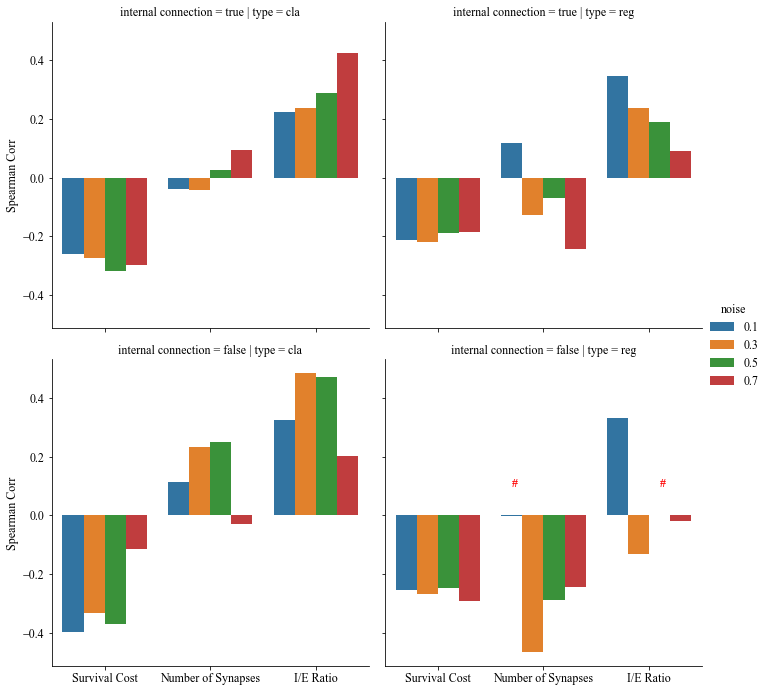

In [94]:
g = sns.catplot('cat', 'r', row='internal connection', col='type', hue='noise', kind='bar', data=df)
g.set_axis_labels('', 'Spearman Corr')
ax = g.axes.flat[-1]
ax.text(0.7, 0.1, '#', color='r', fontweight='bold')
ax.text(2.1, 0.1, '#', color='r', fontweight='bold')
g.savefig('images/spearman.pdf')

In [84]:
df[df['p'] > 0.001]

,internal connection,type,noise,cat,r,p
37,false,reg,0.1,Number of Synapses,-0.001918,0.564993
44,false,reg,0.5,I/E Ratio,0.001881,0.572648


In [7]:
def read(id_):
    with open(id_ + 'g.tsv', 'r') as f:
        lines = f.readlines()
    genome_shared = pd.read_csv(StringIO(''.join(lines[:2])), delim_whitespace=True)
    genome_types = pd.read_csv(StringIO(''.join(lines[2:])), delim_whitespace=True)
        
    with open(id_ + 'r.tsv', 'r') as f:
        lines = f.readlines()
    
    i = 0
    connection_counts = trivial_counts = 0
    meta = re.compile(r'\d+')
    n = genome_shared.n_types[0]
    connections = np.zeros((n, n), dtype=np.object)
    while i < len(lines)-1:
        if lines[i][0] != '#':
            print(i, len(lines), lines[i])
            raise ValueError('Wrong information on the shape of the matrix')
        
        s, t, ns, nt = tuple(map(int, meta.findall(lines[i])))
        
        # print(s, ns, genome_types.n_cell.iloc[s], t, nt, genome_types.n_cell.iloc[t])
        assert ns == genome_types.n_cell.iloc[s] and nt == genome_types.n_cell.iloc[t]
        
        txt = StringIO(''.join(lines[i+1:i+1+ns]))
        connections[s, t] = np.loadtxt(txt, delimiter='\t', dtype=np.float64)
        
        connection_counts += 1
        if not connections[s, t].any():
            trivial_counts += 1
            
        i = i + 1 + ns
    
    return genome_shared, genome_types, connections, connection_counts, trivial_counts

In [8]:
results = []
for exp, trails in results_dir.items():
    for i in trails: 
        for tid in range(threads):
            for rid in range(elites):
                genome_shared, genome_types, connections, \
                connection_counts, trivial_counts \
                = read(os.path.join(exp, i, '%d_%d' % (tid, rid)))
                df = pd.DataFrame({'internal connection': [exp],
                                   'type': [i[:-1]],
                                   'noise': [(float(i[-1]) * 2 - 1) / 10], 
                                   'genome_shared': [genome_shared], 
                                   'genome_types': [genome_types], 
                                   'connections': [connections], 
                                   'connection_counts': [connection_counts], 
                                   'trivial_counts': [trivial_counts]})
                results.append(df)
results = pd.concat(results, ignore_index=True)
results.head()

,internal connection,type,noise,genome_shared,genome_types,connections,connection_counts,trivial_counts
0,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[0.997 0.9839 0.9705 0.9569 0.9431 0.92...",16,0
1,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[0.9961 0.9809 0.9653 0.9494 0.9332 0.91...",16,0
2,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[1. 0.9874 0.9745 0.9612 0.9476 0.93...",16,0
3,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[0.9961 0.9808 0.9653 0.9494 0.9331 0.91...",16,0
4,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[0.9972 0.9844 0.9713 0.958 0.9445 0.93...",16,0


In [9]:
%load_ext Cython

In [10]:
# %%cython
# import pandas as pd
# import numpy as np
# cimport numpy as np
# cimport cython
# cimport scipy.linalg.cython_blas as blas

# @cython.boundscheck(False)
# @cython.wraparound(False)
# @cython.initializedcheck(False)
# @cython.cdivision(True)
# cdef void laplacian(double[::1,:] lap, double[::1,:] adj, int[::1] r, int[::1] c, double[::1] e):
#     cdef int inc = 1, m = lap.shape[0], n = lap.shape[1]
#     cdef int i, j
#     cdef double w
#     for i in range(r.shape[0]):
#         for j in range(e.shape[0]): e[j] = 0.0
#         e[r[i]] = 1
#         e[c[i]] = -1
#         w = adj[r[i], c[i]]
#         blas.dger(&m, &n, &w, &e[0], &inc, &e[0], &inc, &lap[0, 0], &m)
        
def eigen(results):
    adjs = []
#     laps = []
    eigs = []
    
    for i, row in results.iterrows():
        cumsum = row.genome_types.n_cell.cumsum()
        total = cumsum.iloc[-1]
        
        # Adjacency matrix
        adj = np.zeros((total, total), dtype=np.float64)
        r = 0
        for i, ri in enumerate(cumsum):
            c = 0
            for j in range(row.genome_shared.n_types.values[0]):
                wij = row.connections[i, j]
                ci = row.genome_types.n_cell.iloc[j]
                if type(wij) is np.ndarray:
                    try:
                        adj[r:ri, c:c+ci] = wij
                    except:
                        adj[r:ri, c:c+ci] = wij[:,None]
                c += ci
            r = ri
    
#         # Laplacian matrix
#         lap = np.zeros(adj.shape, dtype=np.float64, order='F')
#         r, c = np.where(adj != 0)
#         r = np.asfortranarray(r, dtype=np.int32)
#         c = np.asfortranarray(c, dtype=np.int32)
#         e = np.zeros(total, dtype=np.float64, order='F')
#         laplacian(lap, np.asfortranarray(adj), r, c, e)

#         lap = np.ascontiguousarray(lap)

        # Spectrum
        vals = np.real(np.linalg.eigvals(adj))
        i = np.argsort(vals)
        vals = vals[i]
        vals = vals[::-1]

        adjs.append(adj)
#         laps.append(lap)
        eigs.append(vals)
    
    results['adjacency'] = pd.Series(adjs, index=results.index)
#     results['laplacian'] = pd.Series(laps, index=results.index)
    results['eigenvals'] = pd.Series(eigs, index=results.index)

In [11]:
eigen(results)
results.head()

,internal connection,type,noise,genome_shared,genome_types,connections,connection_counts,trivial_counts,adjacency,eigenvals
0,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[0.997 0.9839 0.9705 0.9569 0.9431 0.92...",16,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[6.730457173055376, 4.106125136883977, 1.94187..."
1,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[0.9961 0.9809 0.9653 0.9494 0.9332 0.91...",16,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.10417549403581504, 0.10417549403581504, 0.0..."
2,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[1. 0.9874 0.9745 0.9612 0.9476 0.93...",16,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.11197765258173106, 0.11197765258173106, 0.0..."
3,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[0.9961 0.9808 0.9653 0.9494 0.9331 0.91...",16,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[17.611207848490512, 16.89964105733501, 4.3835..."
4,true,cla,0.1,n_types ganglion_th test_loss auc ...,n_cell axon ...,"[[0, [[0.9972 0.9844 0.9713 0.958 0.9445 0.93...",16,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.839281392478589, 5.579842952411738, 2.19215..."


## Structure

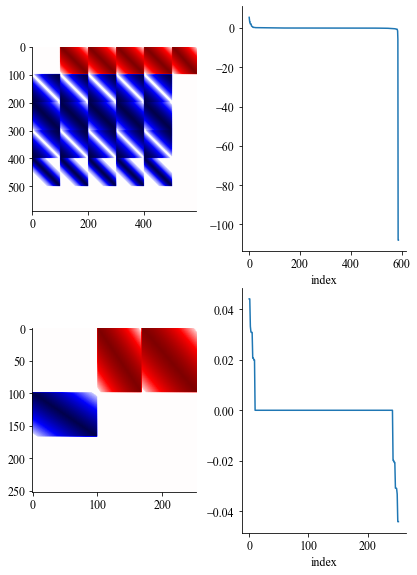

In [12]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(h=8, w=6)
fig.tight_layout()

k2 = 'cla2'

for i, j in enumerate((10, 241)):
    im = ax[i, 0].imshow(results.iloc[j].adjacency, cmap='seismic', vmin=-1, vmax=1)
    
    ax[i, 1].plot(results.iloc[j].eigenvals)
    ax[i, 1].set_xlabel('index')

fig.savefig('images/eigen_example.pdf')

## Scores

<Figure size 576x576 with 0 Axes>

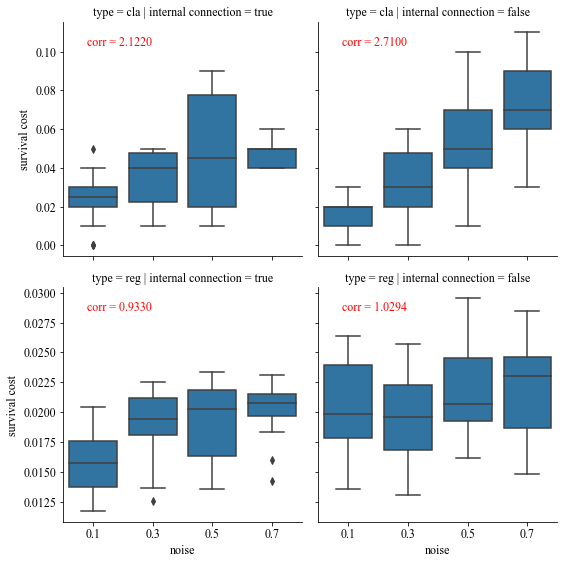

In [13]:
def plot(x, y, color, **kwargs):
    y = [yi.total_cost.values[0] for yi in y]
    ax = sns.boxplot(x, y, color=color, **kwargs)
    corr = np.correlate(x, y)[0]
    plt.text(0.1, 0.9, 'corr = %.4f' % corr, c='r', transform=ax.transAxes)
    
plt.figure(figsize=(8,8))
grid = sns.FacetGrid(results, col='internal connection', row='type', sharey='row', height=4)
grid.map(plot, 'noise', 'genome_shared')
grid.set_axis_labels(y_var='survival cost')

grid.savefig('images/score.pdf')

In [14]:
n_eig = [i.shape[0] for i in results.eigenvals]
spectra_pad = np.zeros((results.shape[0], max(n_eig)))

for i, row in results.iterrows():
    spectra_pad[i, :n_eig[i]] = row.eigenvals
scaled_spectra = StandardScaler().fit_transform(spectra_pad)
scaled_spectra.shape

(480, 631)

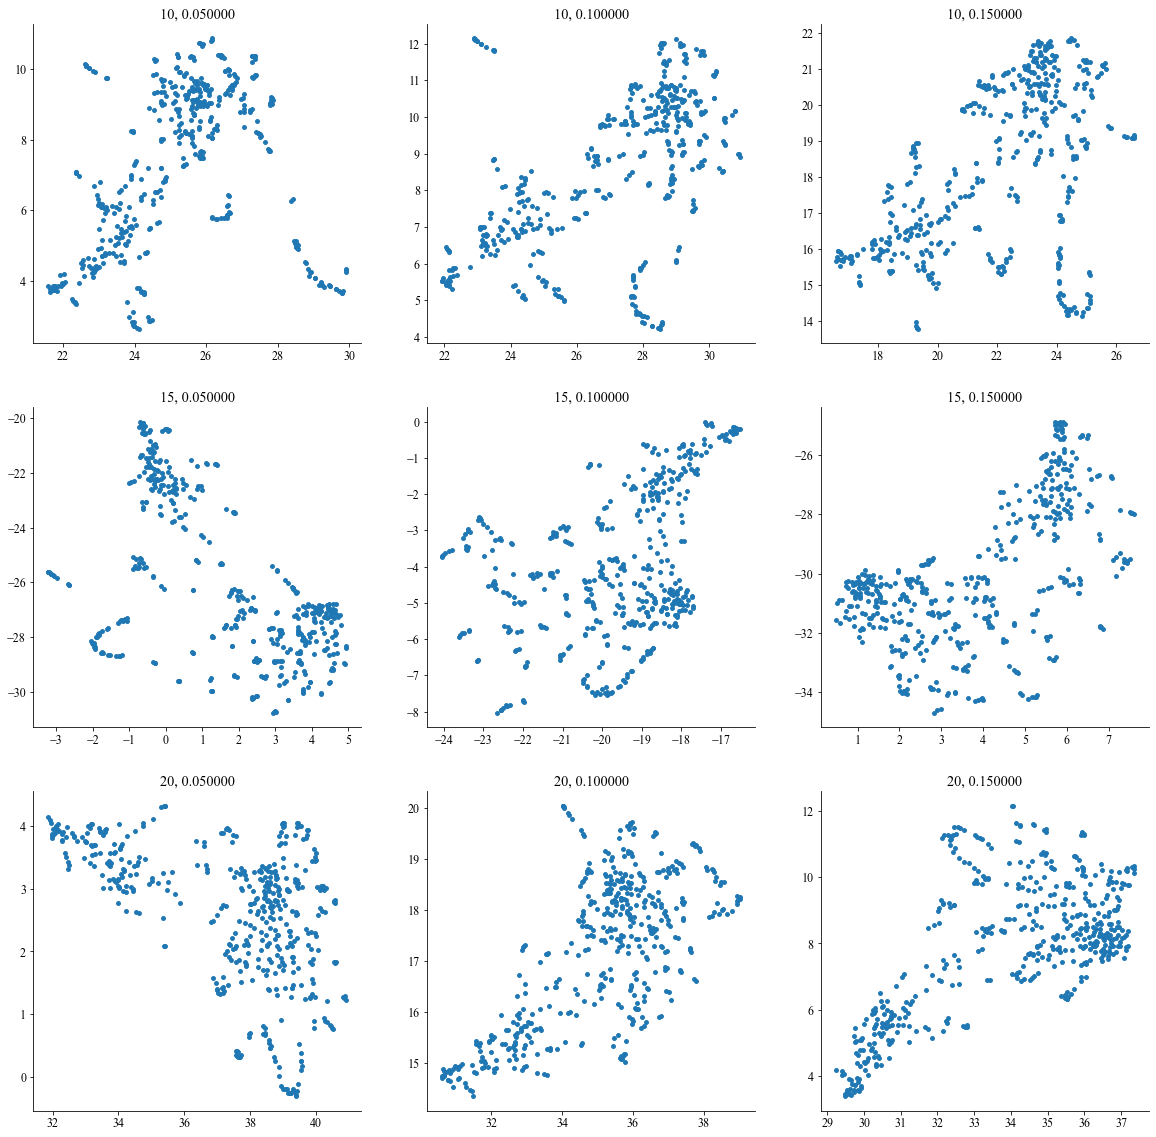

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
neighs = [10, 15, 20]
min_dists = [0.05, 0.1, 0.15]
for (i, ni), (j, nj) in product(enumerate(neighs), enumerate(min_dists)):
    reducer = umap.UMAP(n_neighbors=ni, min_dist=nj)
    Y_umap = reducer.fit_transform(scaled_spectra)
    ax[i, j].scatter(*Y_umap.T, s=15)
    ax[i, j].set_title('%d, %f' % (ni, nj))

In [16]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.05)
Y_umap = reducer.fit_transform(scaled_spectra)
results['umap_x'] = pd.Series(Y_umap[:, 0], index=results.index)
results['umap_y'] = pd.Series(Y_umap[:, 1], index=results.index)

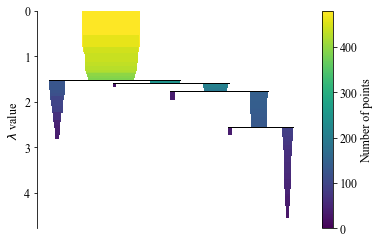

In [17]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10)
struct_labels = clusterer.fit_predict(Y_umap)
clusterer.condensed_tree_.plot()

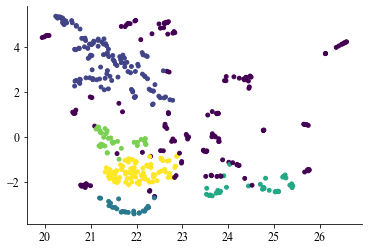

In [18]:
plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c=struct_labels, s=15)

In [19]:
results['struct_label'] = pd.Series(struct_labels, index=results.index)

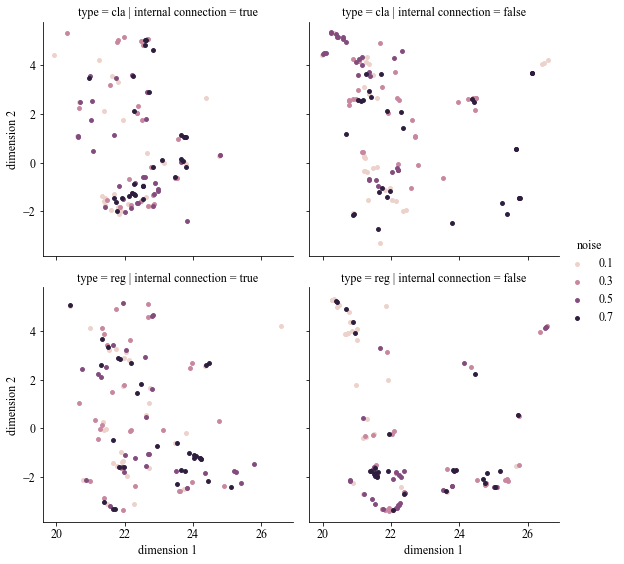

In [20]:

def plot(x, y, color, **kwargs):
    plt.scatter(x, y, c=[color], s=15, **kwargs)
grid = sns.FacetGrid(results, col='internal connection', row='type', hue='noise', height=4, palette=palette)
grid.map(plot, 'umap_x', 'umap_y')
grid.add_legend()
grid.set_axis_labels(x_var='dimension 1', y_var='dimension 2')

grid.savefig('images/struct_umap_noise_lvl.pdf')

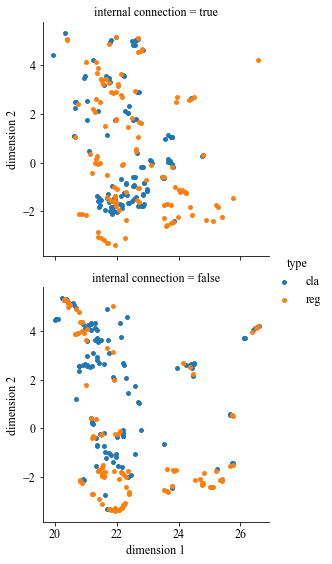

In [21]:
def plot(x, y, color, **kwargs):
    plt.scatter(x, y, c=[color], s=15, **kwargs)
grid = sns.FacetGrid(results, row='internal connection', hue='type', height=4)
grid.map(plot, 'umap_x', 'umap_y')
grid.add_legend()
grid.set_axis_labels(x_var='dimension 1', y_var='dimension 2')

grid.savefig('images/struct_umap_cla_vs_reg.pdf')

In [22]:
std_x_cla = results[(results['internal connection'] == 'true') & (results['type'] == 'cla')].umap_x
std_y_cla = results[(results['internal connection'] == 'true') & (results['type'] == 'cla')].umap_y
std_x_reg = results[(results['internal connection'] == 'true') & (results['type'] == 'reg')].umap_x
std_y_reg = results[(results['internal connection'] == 'true') & (results['type'] == 'reg')].umap_y

## Dynamics

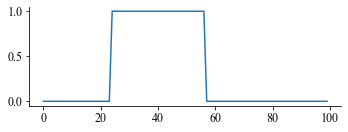

In [23]:
# Generate a random signal of 3 modes
I = np.zeros(100)
I[24:57] += 1
fig, ax = plt.subplots(1, figsize=(5, 2))
ax.plot(I)#, c='black', linewidth=3)
fig.tight_layout()
fig.savefig('images/sig_ref.pdf')

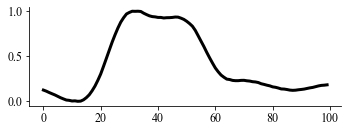

In [24]:
I += np.random.uniform(-0.5, 0.5, 100)
I = np.convolve(I, norm.pdf(np.arange(-10, 11), scale=5), 'same')
I = (I - I.min()) / (I.max() - I.min())
fig, ax = plt.subplots(1, figsize=(5, 2))
ax.plot(I, c='black', linewidth=3)
fig.tight_layout()
fig.savefig('images/sig_per.svg')

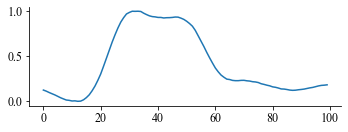

In [25]:
fig, ax = plt.subplots(1, figsize=(5, 2))
ax.plot(I)
fig.tight_layout()
fig.savefig('images/sig_per.pdf')

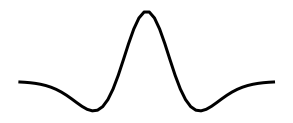

In [26]:
dog = norm.pdf(np.linspace(-1, 1), scale=0.2) - norm.pdf(np.linspace(-1, 1), scale=0.3) 
plt.figure(figsize=(5, 2))
plt.plot(dog, c='black', linewidth=3)
plt.axis('off')
plt.savefig('images/dog.pdf')

In [27]:
def sim(n_cells, conn):
    tmax = 20
    dt = 0.2
    states = [np.zeros((tmax, i)) for i in n_cells]

    for t in range(1, tmax):
        for i in range(len(states)):
            aux = - states[i][t-1]

            for j in range(len(states)):
                wji = conn[j, i]
                if type(wji) is np.ndarray:
                    if len(wji.shape) == 1:
                        wji = wji[None, :] if states[j][t-1].shape[0] == 1 else wji[:, None]
                        
                    try:
                        aux += expit(states[j][t-1]) @ wji
                    except:
                        print(aux.shape, states[j][t-1].shape, wji.shape)

            states[i][t] = states[i][t-1] + dt / 2 * aux

            if i == 0:
                states[i][t] += I
    return states

In [28]:
k = 0
responses = []
for _, row in results.iterrows():
    n_cells = row.genome_types.n_cell
    conn = row.connections
    states = sim(n_cells, conn)
    responses.append(expit(states[k][-1]))
    
results['receptor_responses'] = pd.Series(responses, index=results.index)

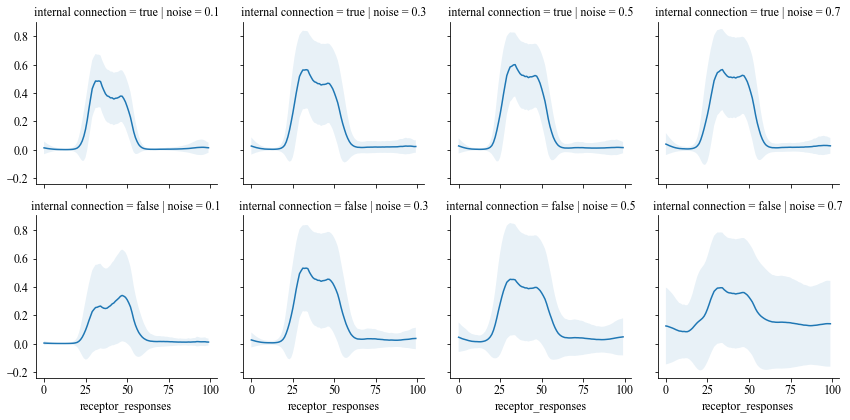

In [29]:
def plot(x, color, **kwargs):
    x = np.vstack(x.to_list())
    x_mean = x.mean(axis=0)
    x_std = x.std(axis=0)
    a = np.arange(100)
    plt.fill_between(a, x_mean - x_std, x_mean + x_std, alpha=0.1)
    plt.plot(a, x_mean)
    
grid = sns.FacetGrid(results, col='noise', row='internal connection')
grid.map(plot, 'receptor_responses')

grid.savefig('images/sig_response.pdf')

In [30]:
responses_int = np.vstack(results[results['internal connection'] == 'true'].receptor_responses.to_list())
responses_int = responses_int[:, list(range(24)) + list(range(57, 100))]
responses_int = responses_int.mean(axis=1)
responses_int.shape

(240,)

In [31]:
responses_noi = np.vstack(results[results['internal connection'] == 'false'].receptor_responses.to_list())
responses_noi = responses_noi[:, list(range(24)) + list(range(57, 100))]
responses_noi = responses_noi.mean(axis=1)
responses_noi.shape

(240,)

In [32]:
ttest_rel(responses_int, responses_noi)

Ttest_relResult(statistic=-3.3769879506696587, pvalue=0.0008553371570082072)

In [33]:
responses = np.vstack(results.receptor_responses.to_list())

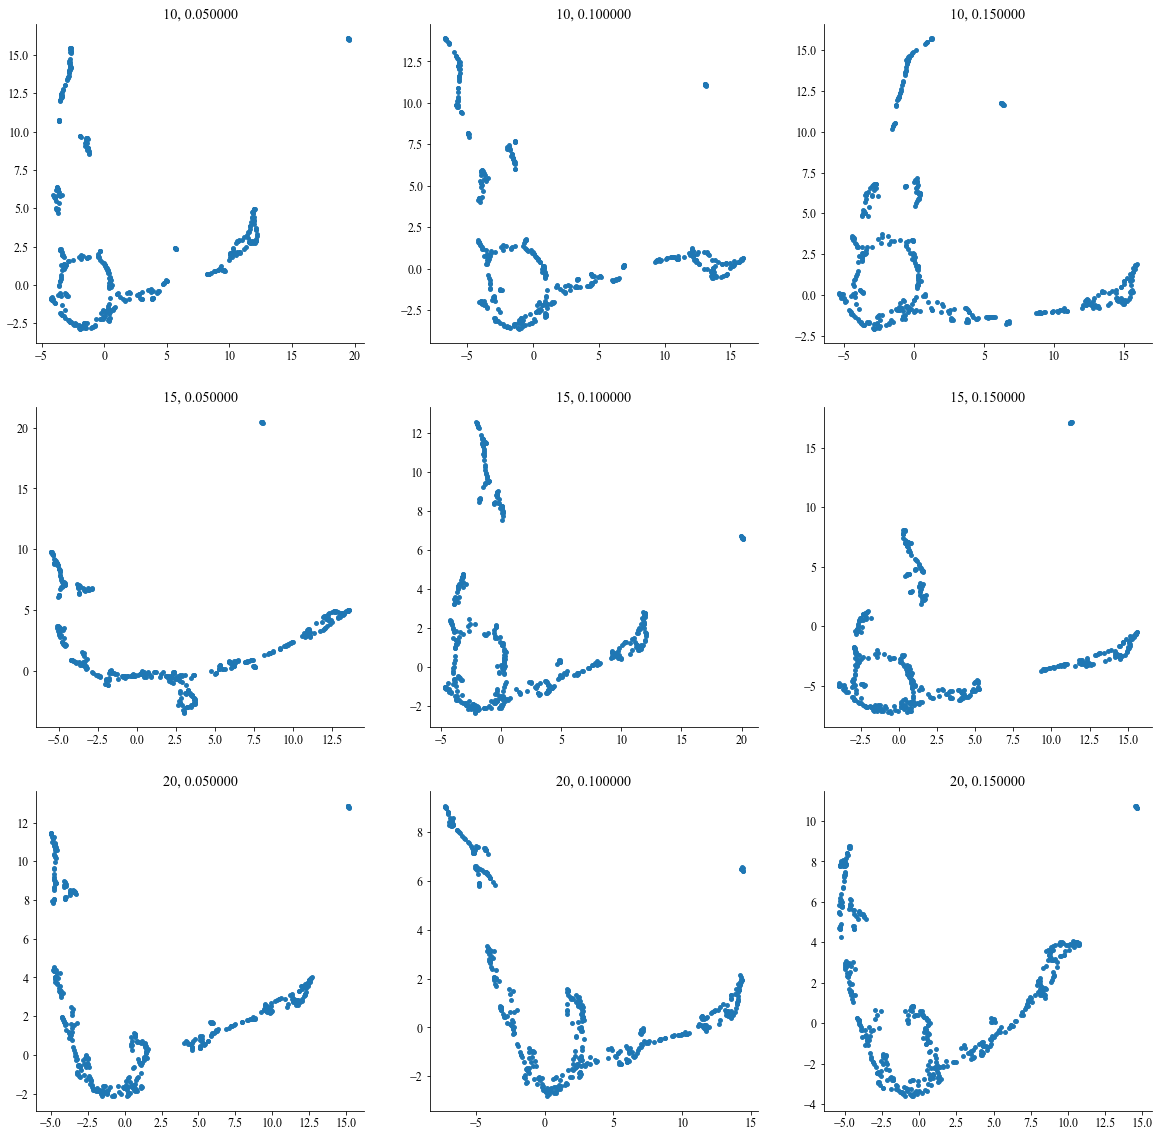

In [34]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
neighs = [10, 15, 20]
min_dists = [0.05, 0.1, 0.15]
for (i, ni), (j, nj) in product(enumerate(neighs), enumerate(min_dists)):
    reducer = umap.UMAP(n_neighbors=ni, min_dist=nj)
    Y_umap = reducer.fit_transform(responses)
    ax[i, j].scatter(*Y_umap.T, s=15)
    ax[i, j].set_title('%d, %f' % (ni, nj))

In [35]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.05)
Y_umap = reducer.fit_transform(responses)
results['responses_umap_x'] = pd.Series(Y_umap[:, 0], index=results.index)
results['responses_umap_y'] = pd.Series(Y_umap[:, 1], index=results.index)

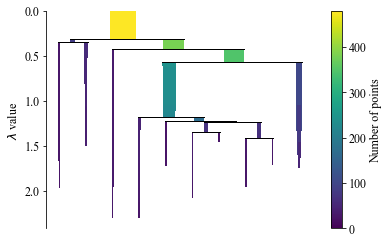

In [36]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10)
struct_labels = clusterer.fit_predict(Y_umap)
clusterer.condensed_tree_.plot()

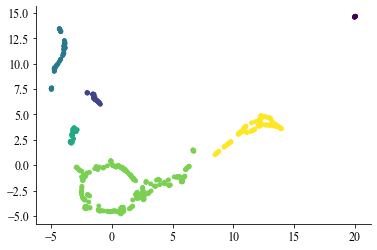

In [37]:
plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c=struct_labels, s=15)

In [38]:
results['dyn_label'] = pd.Series(struct_labels, index=results.index)

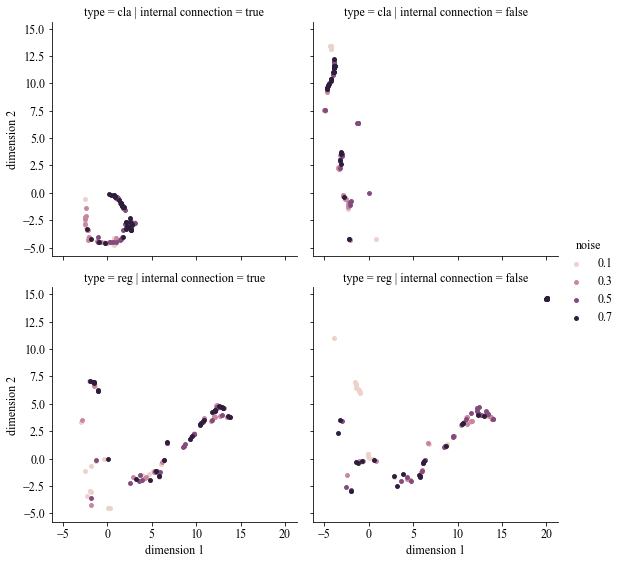

In [39]:
def plot(x, y, color, **kwargs):
    plt.scatter(x, y, c=[color], s=15, **kwargs)
grid = sns.FacetGrid(results, col='internal connection', row='type', hue='noise', height=4, palette=palette)
grid.map(plot, 'responses_umap_x', 'responses_umap_y')
grid.add_legend()
grid.set_axis_labels(x_var='dimension 1', y_var='dimension 2')

grid.savefig('images/sig_response_umap_noise_lvl.pdf')

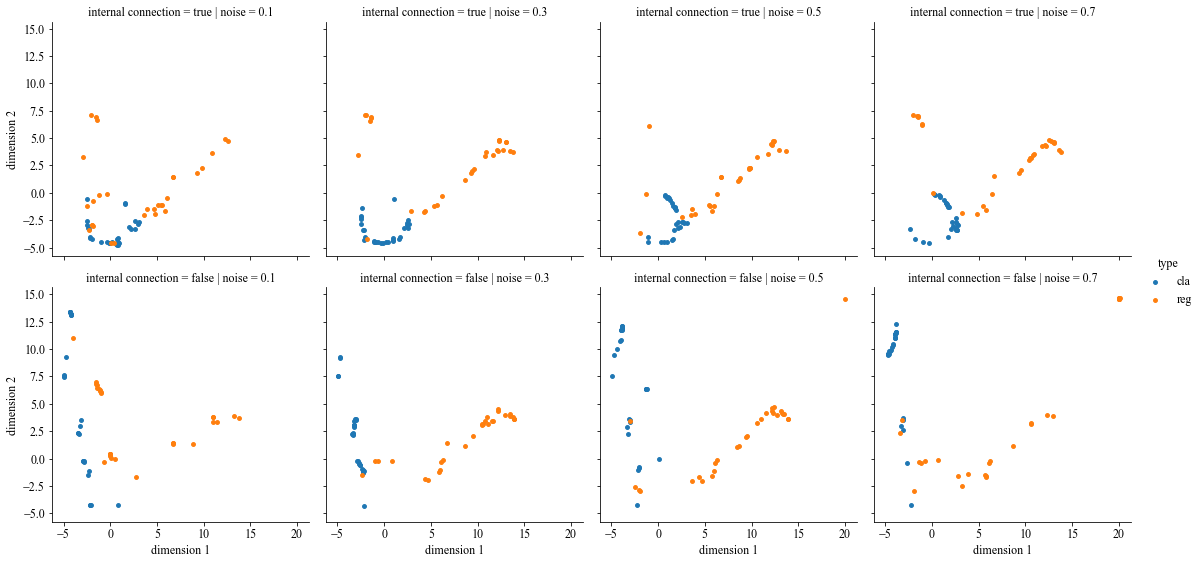

In [40]:
def plot(x, y, color, **kwargs):
    plt.scatter(x, y, c=[color], s=15, **kwargs)
grid = sns.FacetGrid(results, row='internal connection', hue='type', col='noise', height=4)
grid.map(plot, 'responses_umap_x', 'responses_umap_y')
grid.add_legend()
grid.set_axis_labels(x_var='dimension 1', y_var='dimension 2')

grid.savefig('images/sig_response_umap_cla_vs_reg.pdf')

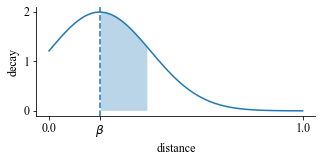

In [41]:
x = np.linspace(0, 1)
y = norm.pdf(x, scale=0.2, loc=0.2)
fig, ax = plt.subplots(1, figsize=(5, 2))
ax.plot(x, y)
ax.axvline(x=0.2, linestyle='--')
x_fill = x[(x >= 0.2) & (x <= 0.4)]
y_fill = norm.pdf(x_fill, scale=0.2, loc=0.2)
ax.fill_between(x_fill, y_fill, np.zeros(x_fill.shape), alpha=0.3)
ax.set_xticks([0.0, 0.2, 1.0])
ax.set_xticklabels([0.0, r'$\beta$', 1.0])
ax.set_ylabel('decay')
ax.set_xlabel('distance')

fig.savefig('images/decay.pdf')

## Cluster Visualization

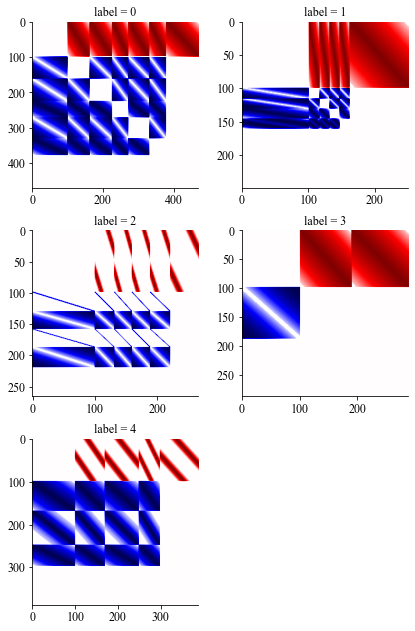

In [130]:
def plot(x, color, **kwargs):
    i = np.random.randint(0, len(x))
    plt.imshow(x.iloc[i], cmap='seismic', vmin=-1, vmax=1)
grid = sns.FacetGrid(results[results.struct_label != -1], col='struct_label', sharex=False, sharey=False, col_wrap=2)
grid.map(plot, 'adjacency')
grid.set_titles('label = {col_name}')
grid.set_xlabels('')

grid.savefig('images/clusteradj_struct.pdf')

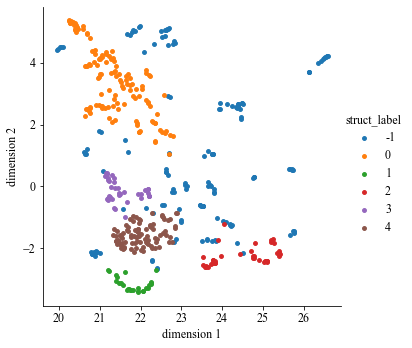

In [103]:
grid = sns.FacetGrid(results, hue='struct_label', height=5)
grid.map(plt.scatter, 'umap_x', 'umap_y', s=15)
grid.add_legend()
grid.set_axis_labels(x_var='dimension 1', y_var='dimension 2')

grid.savefig('images/clustervis_struct.pdf')

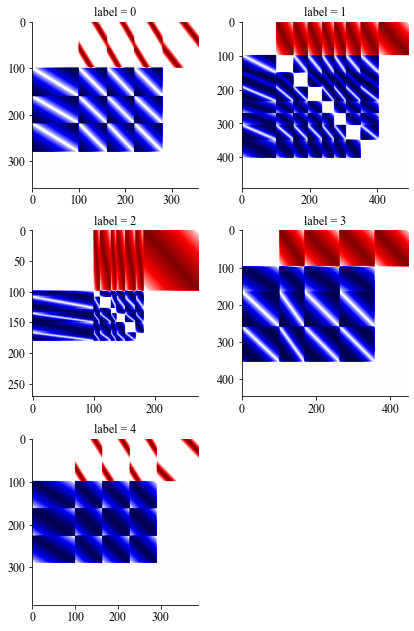

In [144]:
def plot(x, color, **kwargs):
    i = np.random.randint(0, len(x))
    plt.imshow(x.iloc[i], cmap='seismic', vmin=-1, vmax=1)
grid = sns.FacetGrid(results[results.dyn_label != -1], col='dyn_label', sharex=False, sharey=False, col_wrap=2)
grid.map(plot, 'adjacency')
grid.set_titles('label = {col_name}')
grid.set_xlabels('')

grid.savefig('images/clusteradj_dyn.pdf')

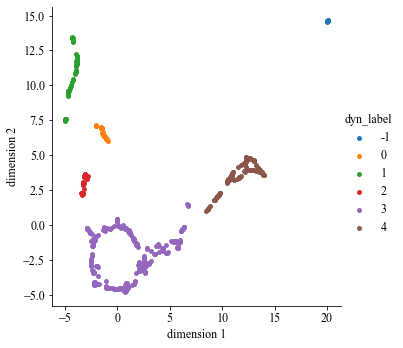

In [45]:
grid = sns.FacetGrid(results, hue='dyn_label', height=5)
grid.map(plt.scatter, 'responses_umap_x', 'responses_umap_y', s=15)
grid.add_legend()
grid.set_axis_labels(x_var='dimension 1', y_var='dimension 2')

grid.savefig('images/clustervis_dyn.pdf')